<a href="https://colab.research.google.com/github/sazastra/AI/blob/main/Ai_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing**

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import files

In [4]:
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")
df.shape

(235795, 56)

In [5]:
#overview of dataset
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [6]:
#more info about dataset
print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [7]:
#find number of unique values in categorical features
for col in df.select_dtypes(include=['object', 'category']).columns:
	unique_count = df[col].nunique()
	print(f"Number of unique categories in {col}: {unique_count}")

Number of unique categories in FILENAME: 235795
Number of unique categories in URL: 235370
Number of unique categories in Domain: 220086
Number of unique categories in TLD: 695
Number of unique categories in Title: 197874


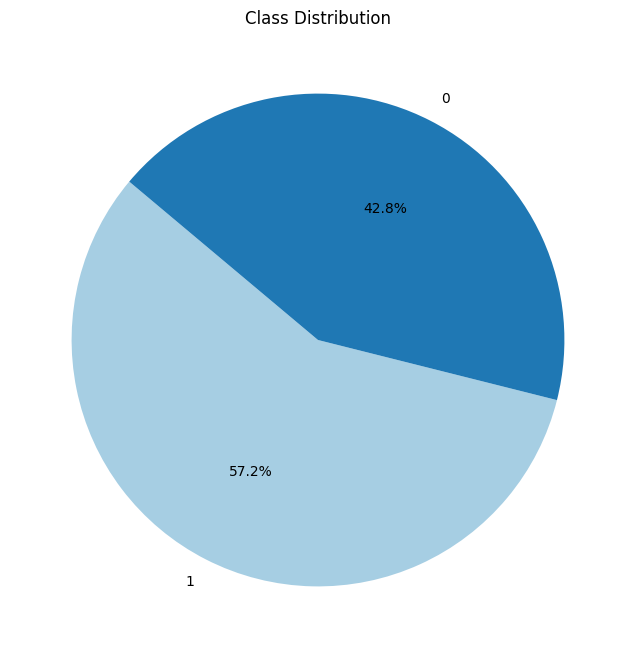

In [8]:
# plot a pie chart with label class distribution
value_counts = df['label'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Class Distribution")
plt.show()


In [9]:
columns_to_remove = ['Domain', 'URL', 'FILENAME','Title'] # features not needed for our task
df = df.drop(columns=columns_to_remove, errors='ignore')

#checking if removal was successful
print(df.columns)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split

# split the dataset  into training and testing sets
sampled_train, sampled_test = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)

# check the distribution in the splits
print("Class Distribution in Training Set:\n", sampled_train['label'].value_counts(normalize=True))
print("Class Distribution in Test Set:\n", sampled_test['label'].value_counts(normalize=True))

# display the sizes of the splits
print(f"Training set size: {len(sampled_train)} instances")
print(f"Test set size: {len(sampled_test)} instances")


Class Distribution in Training Set:
 label
1    0.571895
0    0.428105
Name: proportion, dtype: float64
Class Distribution in Test Set:
 label
1    0.571895
0    0.428105
Name: proportion, dtype: float64
Training set size: 188636 instances
Test set size: 47159 instances


In [11]:
print(f"Number of instances in the training sampled dataset: {len(sampled_train)}")
print(f"Shape of the sampled dataset: {sampled_train.shape}")

Number of instances in the training sampled dataset: 188636
Shape of the sampled dataset: (188636, 52)


In [12]:
print("Class distribution in the sampled dataset:")
print(sampled_train['label'].value_counts())

Class distribution in the sampled dataset:
label
1    107880
0     80756
Name: count, dtype: int64


In [13]:
# identify non-numeric columns
non_numeric_columns = sampled_train.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['TLD'], dtype='object')


In [14]:
from sklearn.preprocessing import OrdinalEncoder

#removing NaN, inf values
sampled_train.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


# Ordinal encoding for the TLD column
encoder = OrdinalEncoder()
TLD_categorical_train=sampled_train['TLD']
sampled_train['TLD'] = encoder.fit_transform(sampled_train[['TLD']])

# Check the transformed column
print("Encoded TLD column:")
print(sampled_train['TLD'].head())

Encoded TLD column:
104874    219.0
176003    368.0
137445    555.0
38100     482.0
65088     219.0
Name: TLD, dtype: float64


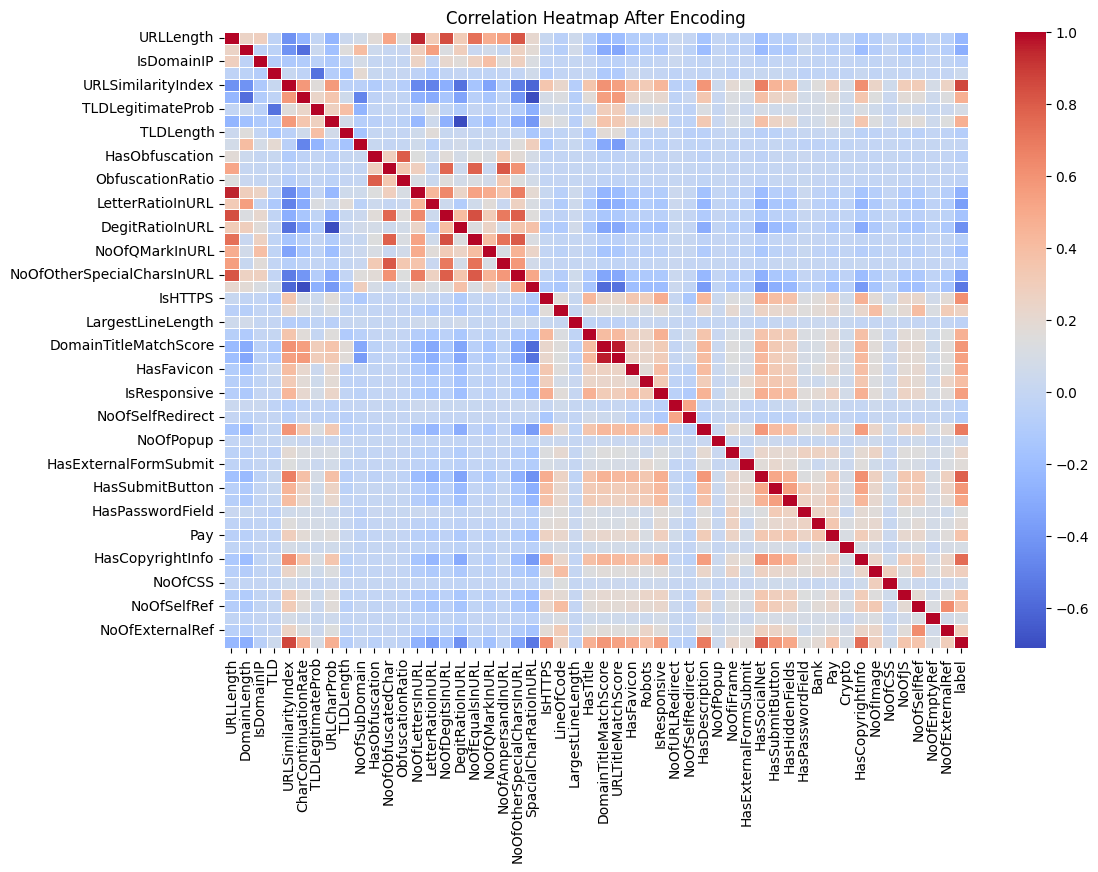

In [15]:
correlation_matrix = sampled_train.corr()

# visualizing
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap After Encoding")
plt.show()

In [16]:
# correlation with the label to find the features with most affect on label
target_correlation = correlation_matrix['label'].sort_values(ascending=False)
print("Top Correlations with the Label:")
print(target_correlation)


Top Correlations with the Label:
label                         1.000000
URLSimilarityIndex            0.860443
HasSocialNet                  0.783682
HasCopyrightInfo              0.742820
HasDescription                0.690587
IsHTTPS                       0.609105
DomainTitleMatchScore         0.583463
HasSubmitButton               0.578994
IsResponsive                  0.548483
URLTitleMatchScore            0.538363
HasHiddenFields               0.507307
HasFavicon                    0.493375
URLCharProb                   0.470242
CharContinuationRate          0.467198
HasTitle                      0.459890
Robots                        0.393578
Pay                           0.359622
NoOfSelfRef                   0.358908
NoOfJS                        0.354530
NoOfExternalRef               0.294295
NoOfImage                     0.284365
LineOfCode                    0.264284
NoOfiFrame                    0.220761
Bank                          0.189823
HasExternalFormSubmit         0

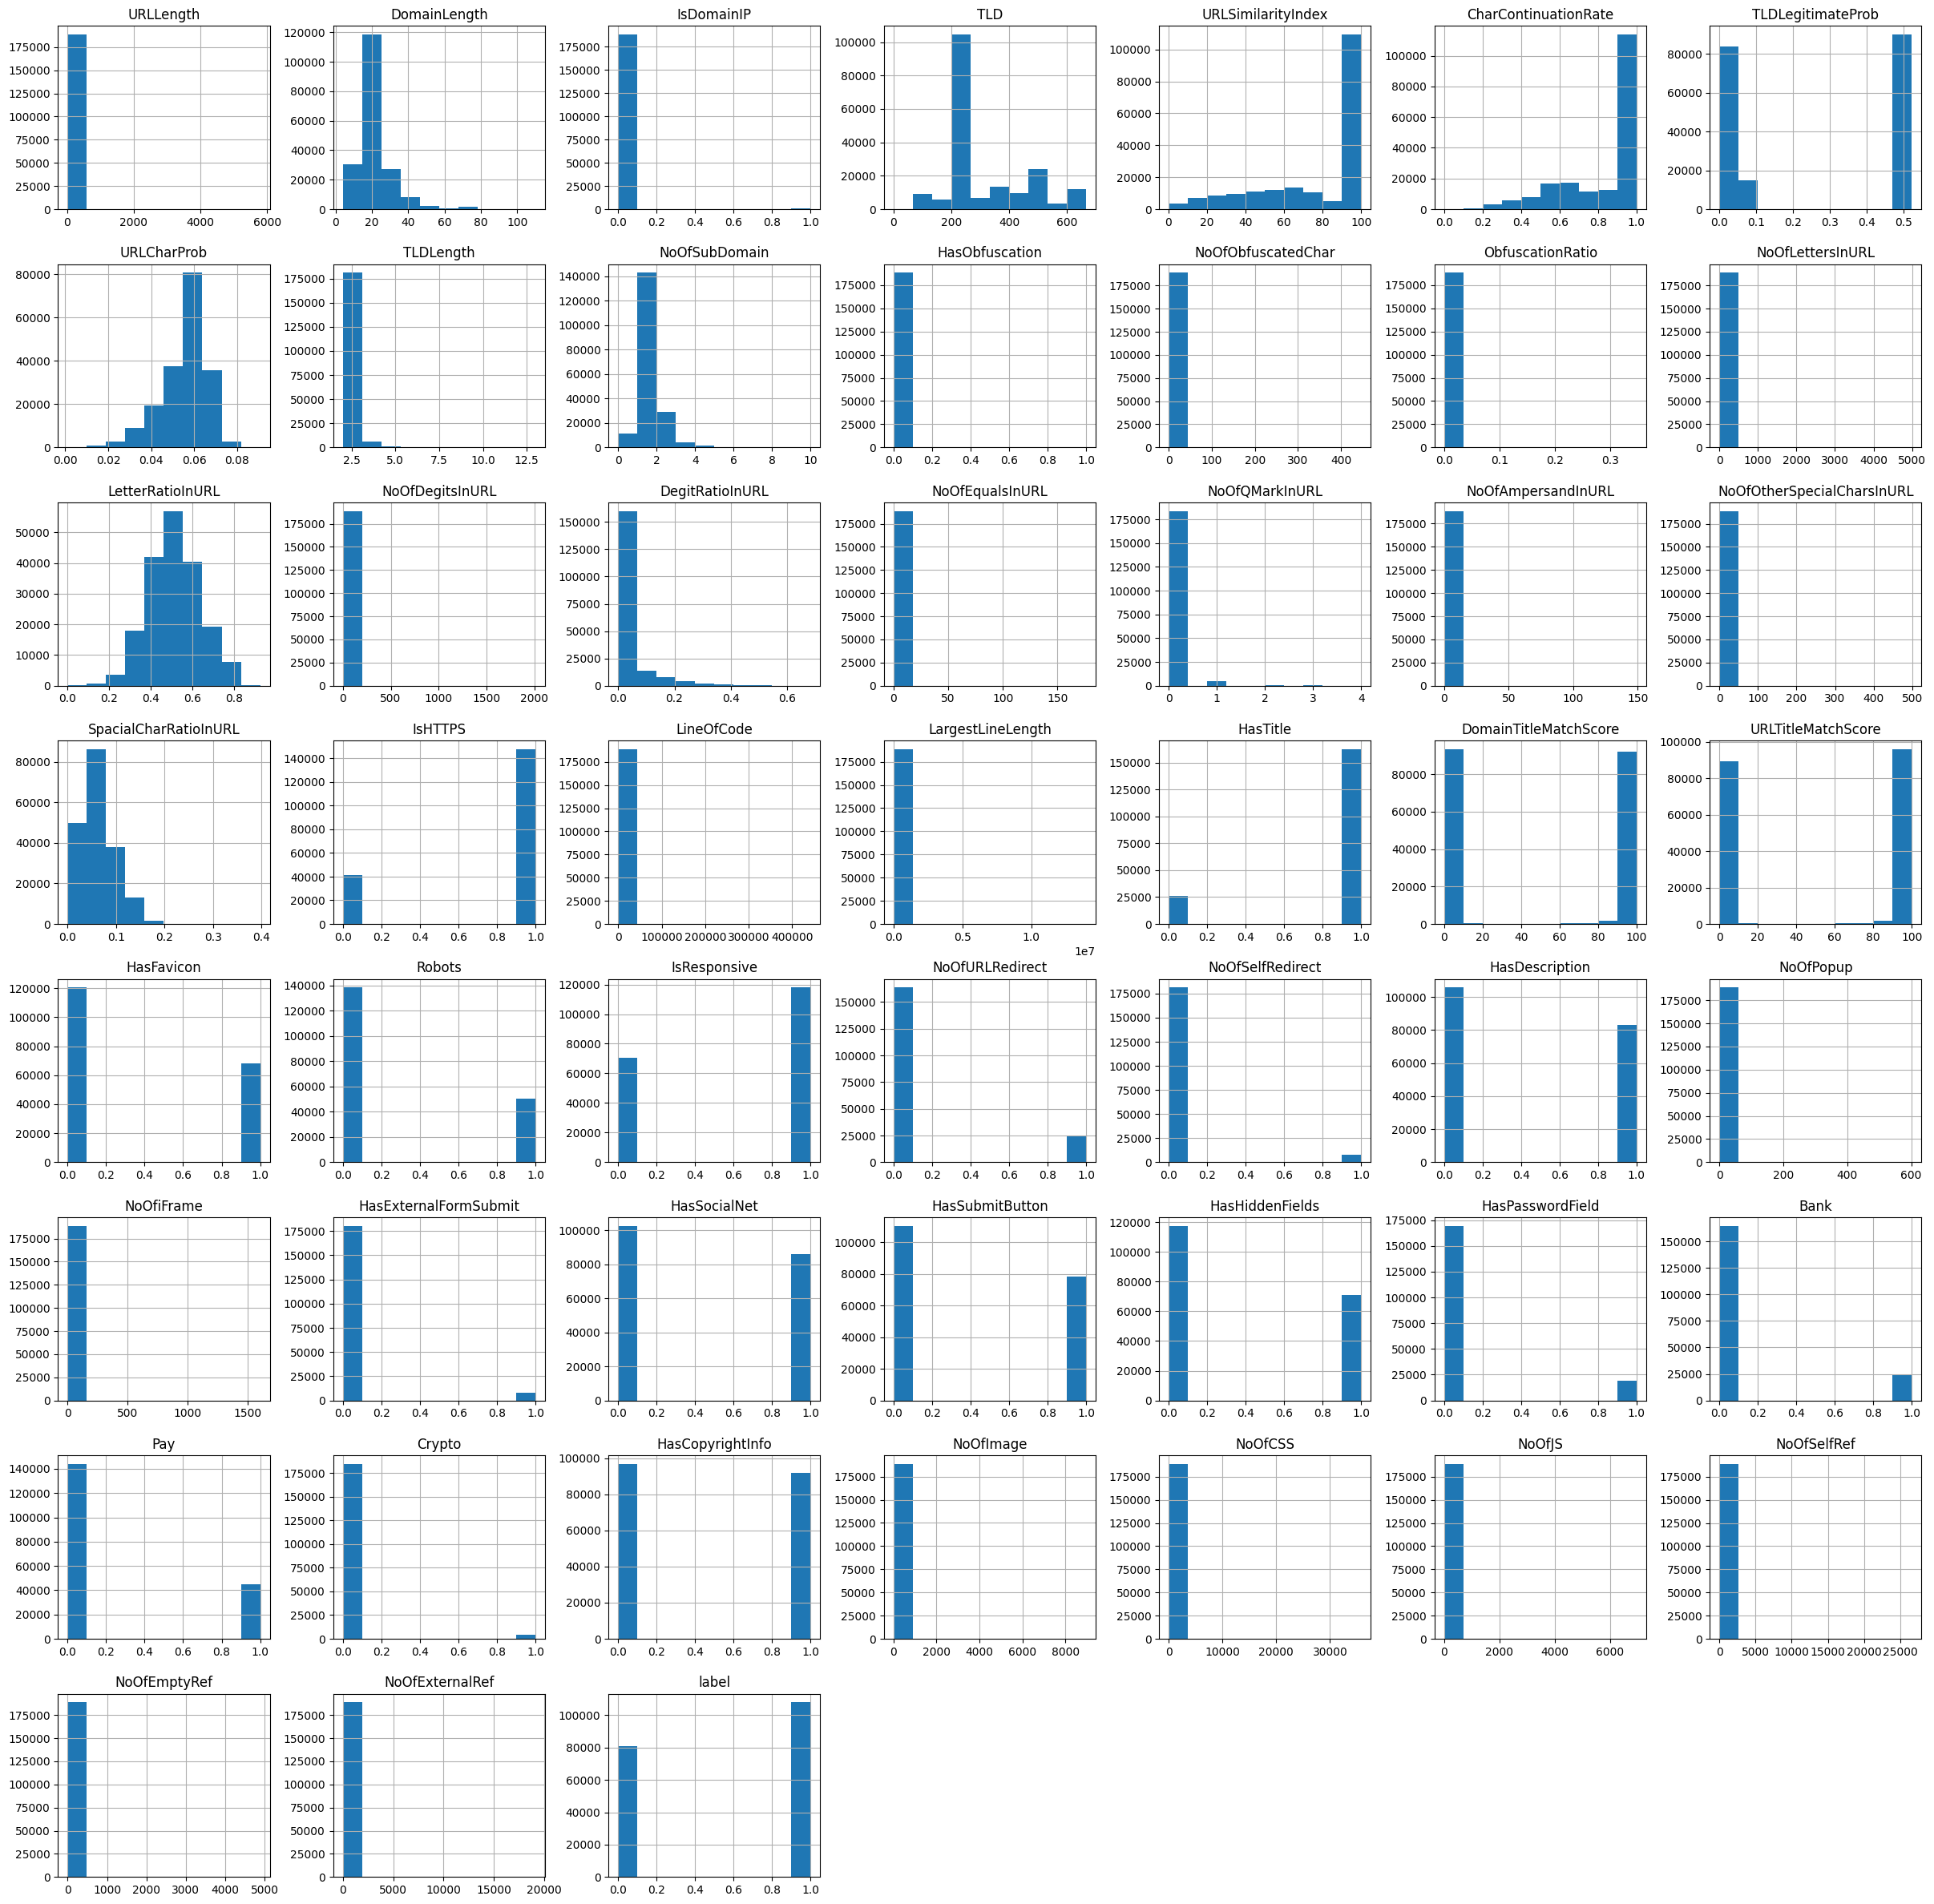

In [22]:
#hist visualiaztion
sampled_train.hist(figsize=(30, 30))
plt.show()

In [23]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler # to keep true/false attributes unaffected
sc = MinMaxScaler()
#remove encoded
encoded_TLD=sampled_train['TLD']
sampled_train_num=sampled_train.drop(columns=['TLD'], inplace=False)
#feature scaling on numerical values
sampled_train_scaled= sc.fit_transform(sampled_train_num)
sampled_train_scaled= pd.DataFrame(sampled_train_scaled, columns=sampled_train_num.columns)

#put back encoded attribute
sampled_train_scaled['TLD']=encoded_TLD

#remove NaN values from scaling because apparently, it is the source of NaNs in dataset :D
sampled_train_scaled.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

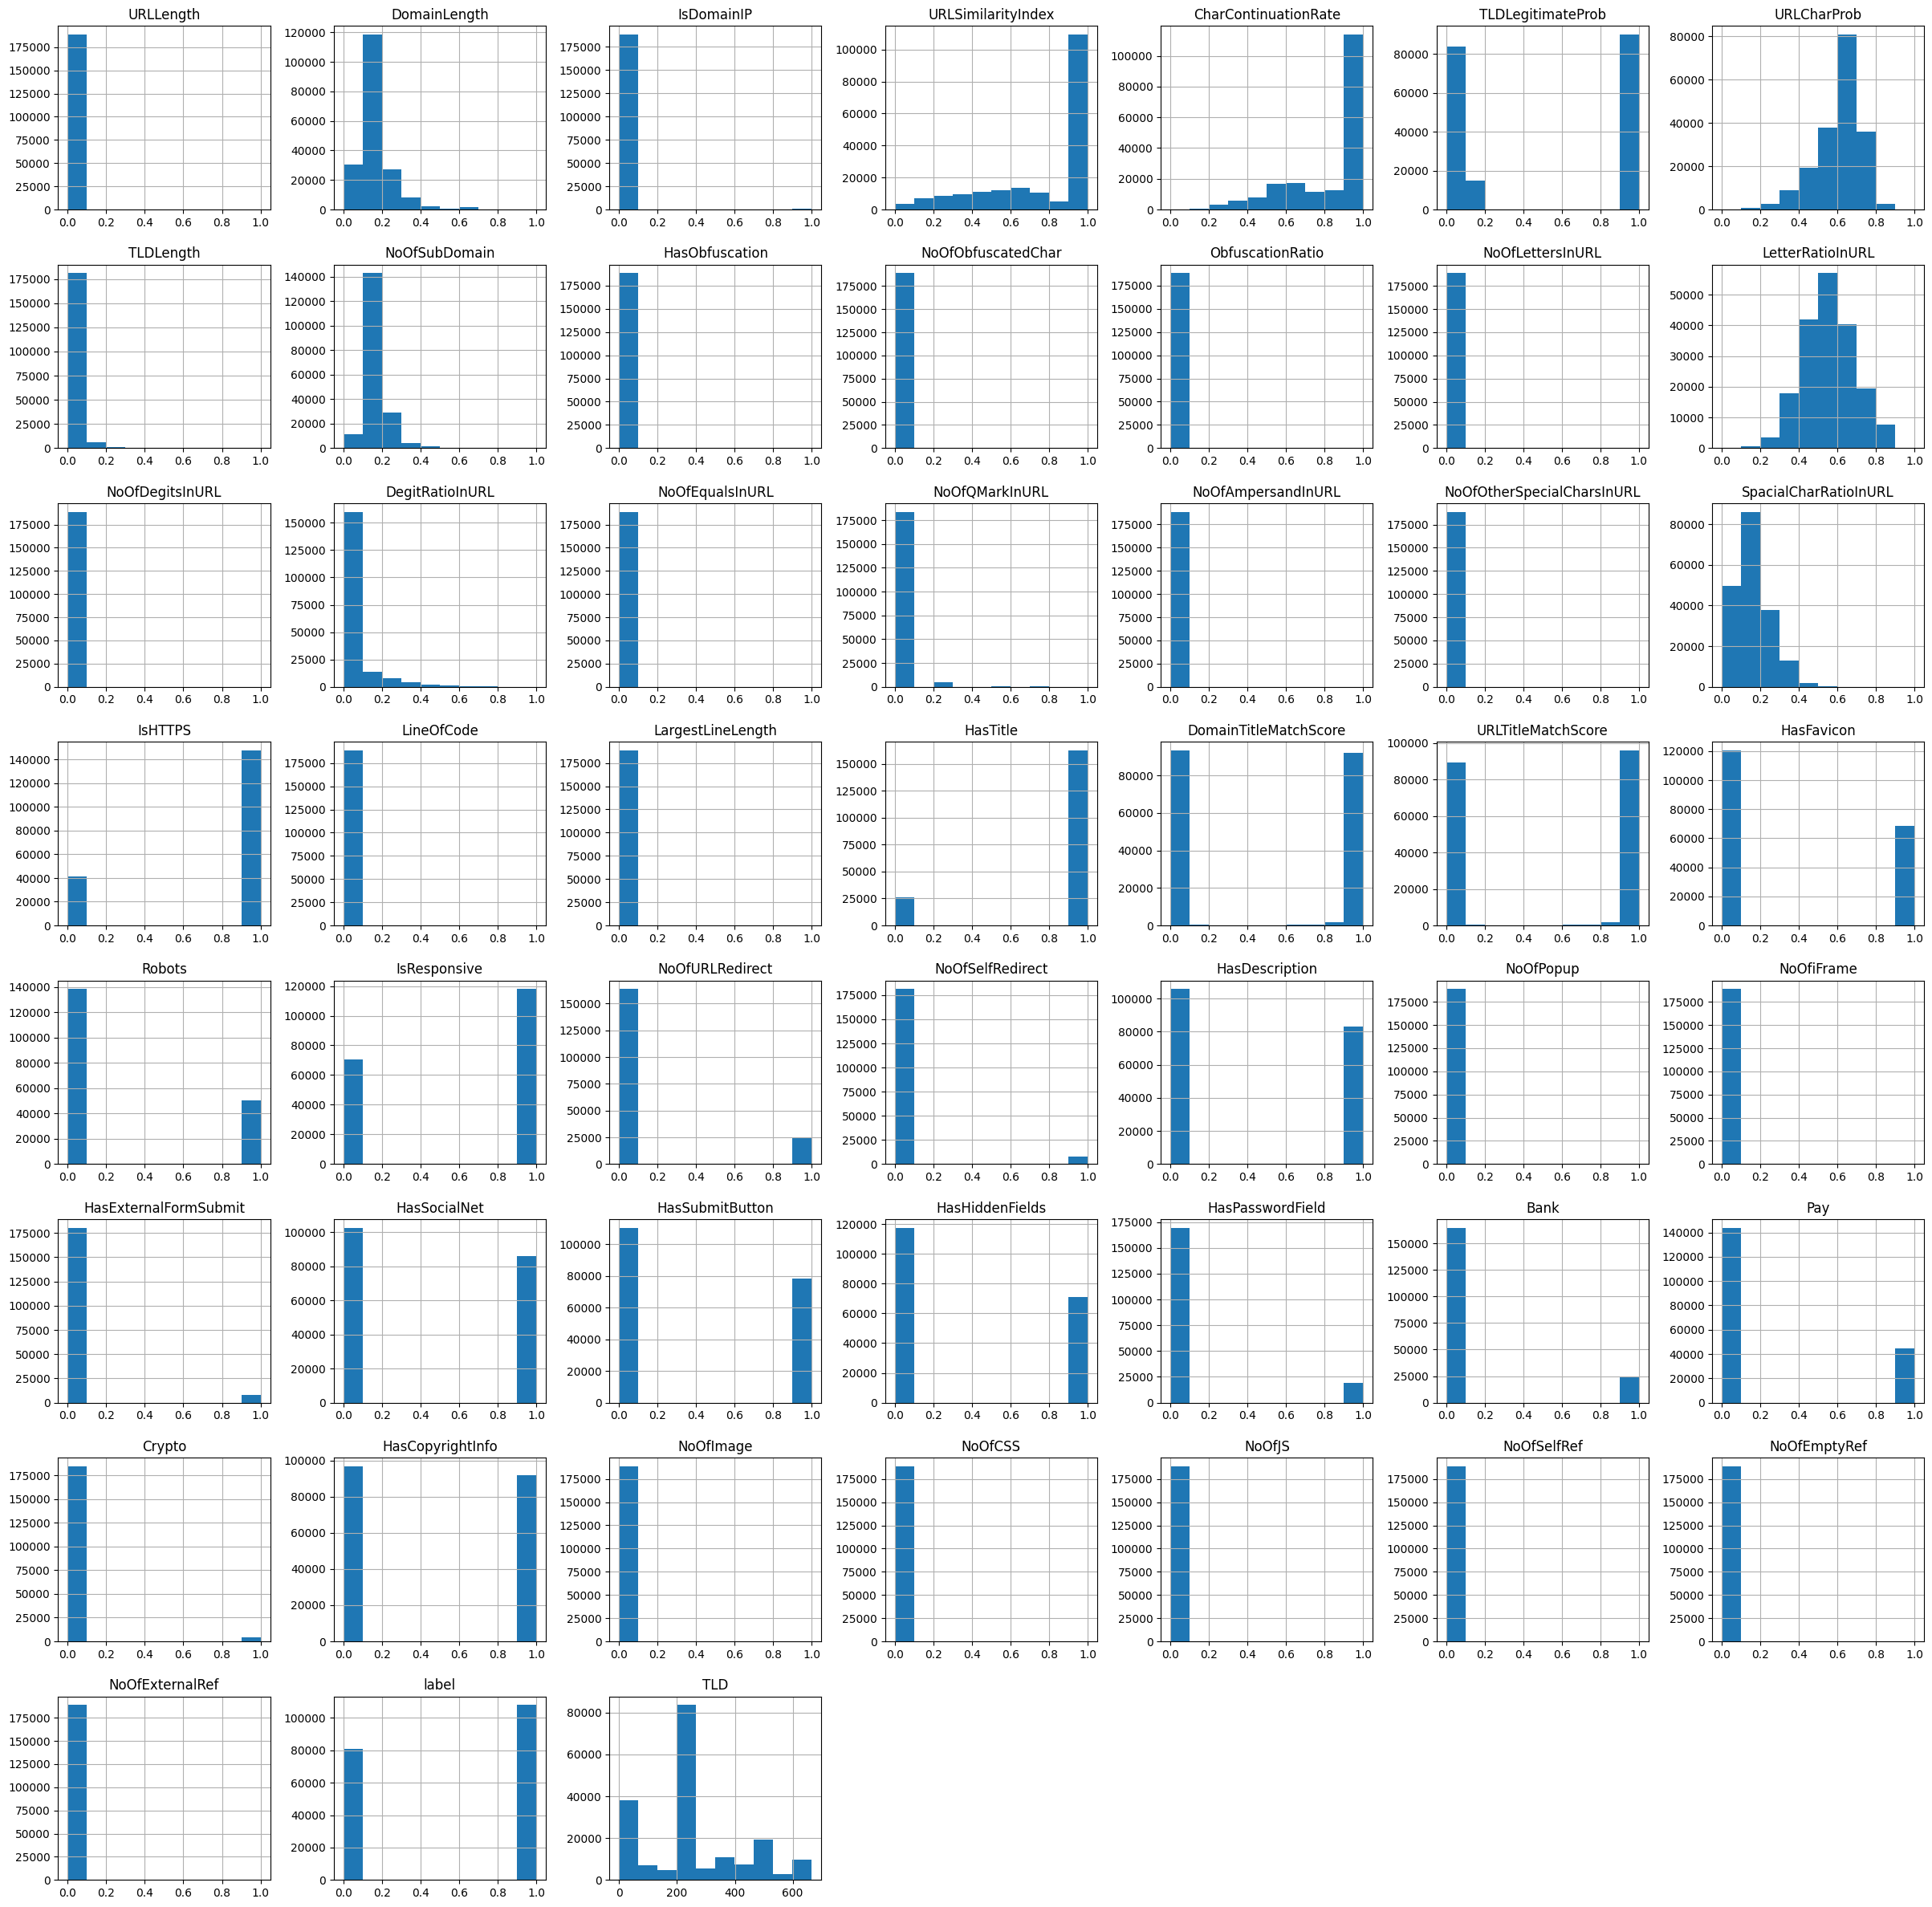

In [24]:
#hist visualiaztion for scaled
sampled_train_scaled.hist(figsize=(30, 30))
plt.show()

# **First Model: Random Forest Classification**

In [25]:
# Random Forest doesn't need scaling, so we use unscaled training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#separate label
y_train=sampled_train['label']
X_train=sampled_train.drop('label',axis=1)

#model RandomForest
model = RandomForestClassifier(random_state=42)

In [ ]:
# the parameter grid to search over
param_grid = {
    'n_estimators': [50,100,150],  # Number of trees -> default is 100 so we testing increasing and decreasing
    'max_depth': [10, 20, 30],  # Max depth of trees
    'min_samples_split': [5, 10],  # Min samples required to split a node
    'min_samples_leaf': [3, 4, 5],    # Min samples required to be at a leaf node
    'bootstrap': [False]  # the whole dataset is used to build each tree
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)


print("Best model:", grid_search.best_estimator_)


KeyboardInterrupt: 

In [27]:
#retesting with more params
param_grid = {
    'n_estimators': [50],  # Number of trees -> default is 100 so we testing increasing and ecreasing
    'max_depth': [20],  # Max depth of trees
    'min_samples_split': [10,15,20],  # Min samples required to split a node
    'min_samples_leaf': [4],    # Min samples required to be at a leaf node
    'bootstrap': [False]  # the whole dataset is used to build each tree
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

best_model_rf = grid_search.best_estimator_
print("Best Model:",best_model_rf)


Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9999840964110878
Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4,
                       min_samples_split=15, n_estimators=50, random_state=42)


In [28]:
#cleaning testing data for RF (no need for scaling) we only need to remove Nan/Inf
sampled_test_rf=sampled_test.copy()
TLD_categorical_test=sampled_test['TLD']
sampled_test_rf['TLD'] = encoder.fit_transform(sampled_test[['TLD']])

sampled_test_rf.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

              precision    recall  f1-score   support

           0   1.000000  0.999950  0.999975     20189
           1   0.999963  1.000000  0.999981     26970

    accuracy                       0.999979     47159
   macro avg   0.999981  0.999975  0.999978     47159
weighted avg   0.999979  0.999979  0.999979     47159



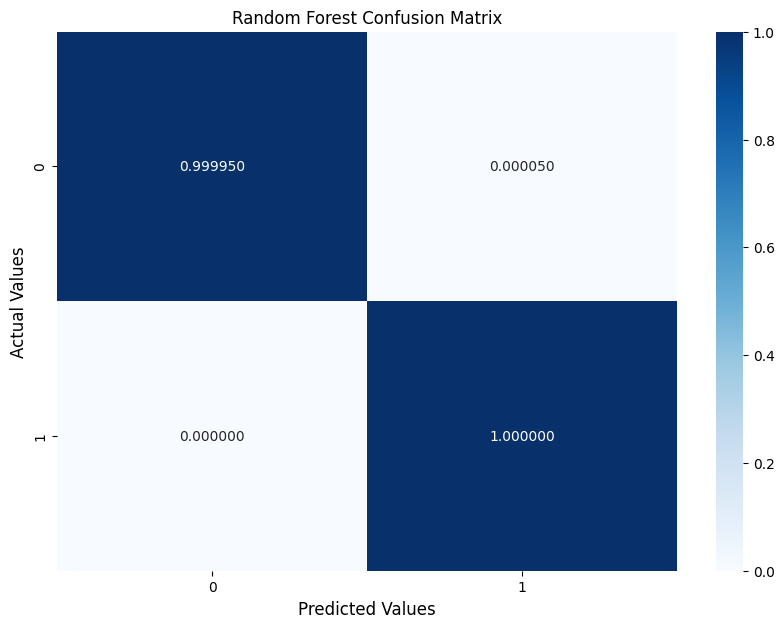

In [37]:
#testing and metrics
from sklearn.metrics import confusion_matrix, classification_report

#separate label
y_test=sampled_test_rf['label']
X_test=sampled_test_rf.drop('label',axis=1)

#testing
y_pred = best_model_rf.predict(X_test)

#metrics
print(classification_report(y_test, y_pred,digits=6))

# confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='.6f', cmap='Blues')

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

In [ ]:
#save best model
import joblib

joblib.dump(best_model_rf, 'best_rf_model.pkl')

# **Second Model: Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


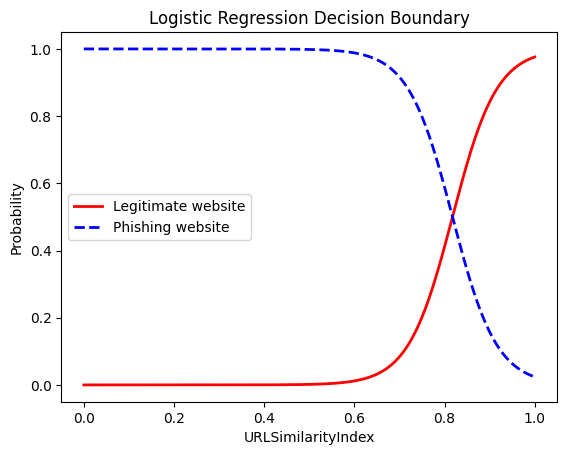

In [39]:
from sklearn.linear_model import LogisticRegression


# separate the label from the dataset
X = sampled_train_scaled.drop(columns=['label'])
y = sampled_train_scaled['label']

# logistic regression model
log_reg = LogisticRegression(solver="lbfgs", random_state=42, max_iter=2000)  # Increased max_iter to ensure convergence
log_reg.fit(X, y)

# Visualize the decision boundary for a single feature (the one with most correlation to label)
feature_index = 3
X_new = np.linspace(X.iloc[:, feature_index].min(), X.iloc[:, feature_index].max(), 1000).reshape(-1, 1)
feature_name = X.columns[feature_index]

# Create a dataset with the same dimensions as the training data
X_mean = np.tile(X.mean(axis=0).values, (1000, 1))
X_mean[:, feature_index] = X_new[:, 0]

# Predict probabilities
y_proba = log_reg.predict_proba(X_mean)

# Plot the decision boundary
plt.plot(X_new, y_proba[:, 1], "r-", linewidth=2, label="Legitimate website")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Phishing website")
plt.xlabel(f"{feature_name}")
plt.ylabel("Probability")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()


Finding the best parameters

In [40]:
from sklearn.model_selection import GridSearchCV
#param grid for search
param_grid = {
    'C': [ 200, 500],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [ 500, 700]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)


grid_search.fit(X, y)

#Best hyperparameters
print(grid_search.best_params_)

#store best
best_model_lr=grid_search.best_estimator_
print("Best model:", best_model_lr)

#save best model
import joblib
joblib.dump(best_model_lr, 'best_LR_model.pkl')

{'C': 500, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best model: LogisticRegression(C=500, max_iter=500)


['best_LR_model.pkl']

Preprocessing test dataset

In [41]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# separating numerical/categorical features and label
sampled_test_num = sampled_test.drop(columns=['TLD', 'label'], inplace=False)
sampled_test_cat = sampled_test['TLD']
sampled_test_label = sampled_test['label']

numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

full_pipeline = ColumnTransformer([
    ("num_pipeline", numerical_pipeline, sampled_test_num.columns),
    ("cat_pipeline", categorical_pipeline, ['TLD'])
])


sampled_test_prepared = full_pipeline.fit_transform(sampled_test)
sampled_test_prepared = pd.DataFrame(sampled_test_prepared, columns=sampled_test_num.columns.tolist() + ['TLD'])

sampled_test_prepared['label'] = sampled_test_label.values

sampled_test_prepared.replace([np.nan, np.inf, -np.inf], 0, inplace=True)


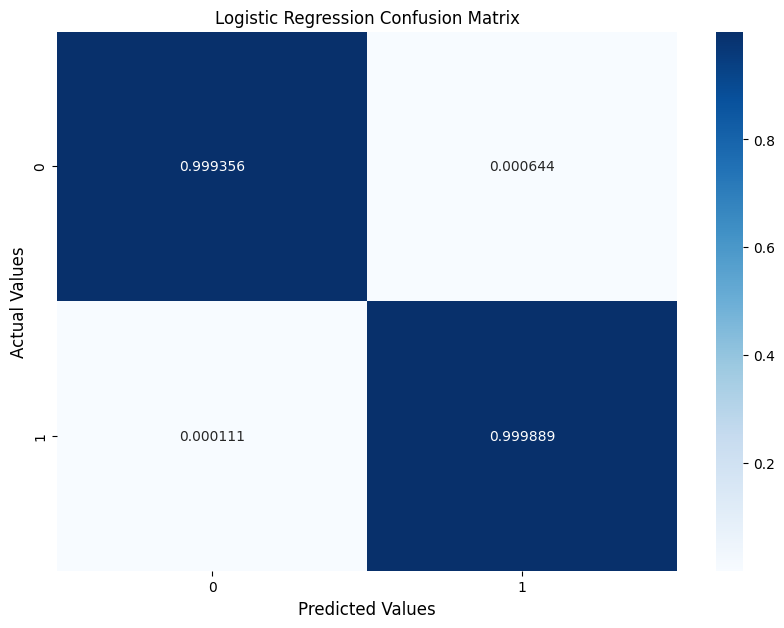

              precision    recall  f1-score   support

           0     0.9999    0.9994    0.9996     20189
           1     0.9995    0.9999    0.9997     26970

    accuracy                         0.9997     47159
   macro avg     0.9997    0.9996    0.9997     47159
weighted avg     0.9997    0.9997    0.9997     47159



In [42]:
# separate label from the dataset
X_test = sampled_test_prepared.drop(columns=['label'])
y_test = sampled_test_prepared['label']


y_pred = best_model_lr.predict(X_test)

#metrics
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='.6f', cmap='Blues')

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()
print(classification_report(y_test, y_pred, digits=4))

# **Third Model: Multinomial Naive Bayes**

Training model and finding best hyperparameters


In [44]:
from sklearn.naive_bayes import MultinomialNB

# Separate the label from the dataset
X = sampled_train_scaled.drop(columns=['label'])
y = sampled_train_scaled['label']

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
best_model_nb = grid_search.best_estimator_
print("Best model:", best_model_nb)

Best parameters: {'alpha': 0.1}
Best model: MultinomialNB(alpha=0.1)


Testing and evaluation

              precision    recall  f1-score   support

           0     0.9652    0.7692    0.8561     20189
           1     0.8500    0.9792    0.9101     26970

    accuracy                         0.8893     47159
   macro avg     0.9076    0.8742    0.8831     47159
weighted avg     0.8993    0.8893    0.8870     47159



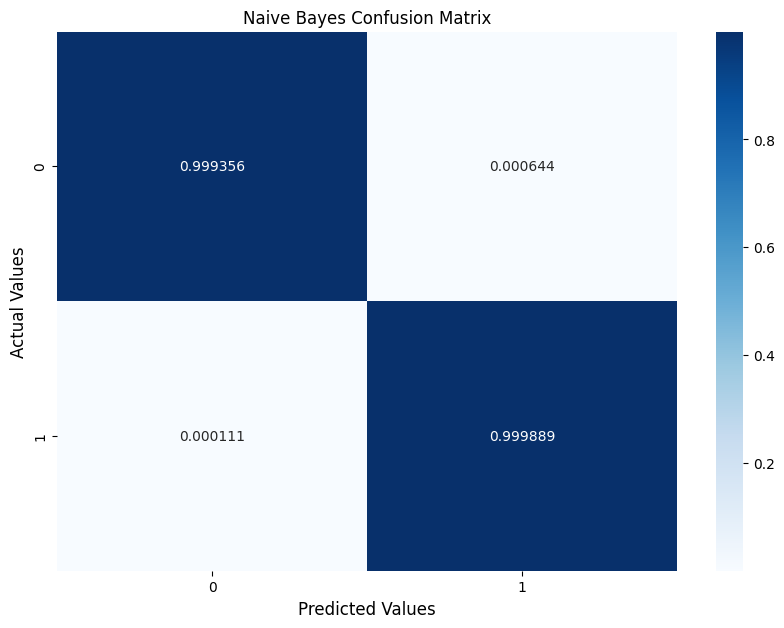

In [45]:
X_test = sampled_test_prepared.drop(columns=['label'])
y_test = sampled_test_prepared['label']


y_pred = best_model_nb.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='.6f', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

# **Fourth Model: Artificial Neural Networks Model**

In [ ]:
!pip install keras-tuner --quiet
from keras_tuner import RandomSearch
#Imports for ANN
import tensorflow as tf
from tensorflow.keras import layers
from keras_tuner import RandomSearch

Splitting the training data for modeling

In [52]:
# separate label
y_train_scaled=sampled_train_scaled['label']
x_train_scaled=sampled_train_scaled.drop('label',axis=1)

# Split the 80% (training + validation) into 70% training and 10% validation
x_train_ann, x_val_ann, y_train_ann, y_val_ann = train_test_split(x_train_scaled, y_train_scaled, test_size=0.1, random_state=42, stratify=y_train_scaled)


Build, Train, and Validate the ANN model

In [ ]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=5, step=1)
    n_neurons = hp.Int("n_neurons", min_value=32, max_value=128, step=32)
    learning_rate = hp.Float("learning_rate", min_value=1e-6, max_value=1e-4, sampling="log")

    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(x_train_scaled.shape[1],)))

    for _ in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation="relu"))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))

    model.add(layers.Dense(1, activation="sigmoid"))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.0)
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy", tf.keras.metrics.AUC()]
    )
    return model


# Keras Tuner to do the random search for best hyperparameters
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    directory="ANN_Model",
    project_name="ANN_Model_Tuning"
)

class StopOnValAccuracy(tf.keras.callbacks.Callback): #to stop training and epochs when a threshold is reached
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get("val_accuracy")
        if val_accuracy is not None and val_accuracy >= self.threshold:
            print(f"\nStopping search: val_accuracy reached {val_accuracy:.4f}, which is above the threshold {self.threshold}")
            self.model.stop_training = True


stop_on_val_accuracy = StopOnValAccuracy(threshold=0.99) # selected threshold

print("Starting Keras Tuner search...")
tuner.search(x_train_ann, y_train_ann, epochs=10, validation_data=(x_val_ann, y_val_ann), batch_size=32, verbose=1)
print("Tuning completed.")

# return the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps.values)

# train the best model
print("Training the best model...")
best_model_ann = tuner.hypermodel.build(best_hps)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = best_model_ann.fit(
    x_train_ann, y_train_ann,
    epochs=50,
    validation_data=(x_val_ann, y_val_ann),
    batch_size=32,
    callbacks=[early_stopping,stop_on_val_accuracy] # stopping criteria -> val_accuracy is fixed for 5 epochs or val accuracy crosses 99%
)

# evaluate the best model on the validation set
print("Evaluating the best model on the validation set...")
metrics = best_model_ann.evaluate(x_val_ann, y_val_ann)
print(f"Validation Loss: {metrics[0]}")
print(f"Validation Accuracy: {metrics[1]}")

To get the best model instantly:

In [53]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Hyperparameters
n_hidden = 4
n_neurons = 96
learning_rate = 5.9582419822558804e-05

# Create the model
best_model_ann = Sequential()

# Add the input layer and hidden layers
best_model_ann.add(Dense(n_neurons, input_shape=(51,), activation='relu'))  # Assuming input size is 10 (adjust as needed)
for _ in range(n_hidden - 1):
    best_model_ann.add(Dense(n_neurons, activation='relu'))

# Output layer (assuming binary classification)
best_model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model with the Adam optimizer
optimizer = Adam(learning_rate=learning_rate)
best_model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
best_model_ann.summary()


class StopOnValAccuracy(tf.keras.callbacks.Callback): #to stop training and epochs when a threshold is reached
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get("val_accuracy")
        if val_accuracy is not None and val_accuracy >= self.threshold:
            print(f"\nStopping search: val_accuracy reached {val_accuracy:.4f}, which is above the threshold {self.threshold}")
            self.model.stop_training = True


stop_on_val_accuracy = StopOnValAccuracy(threshold=0.99) # selected threshold

# train the best model
print("Training the best model...")
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = best_model_ann.fit(
    x_train_ann, y_train_ann,
    epochs=50,
    validation_data=(x_val_ann, y_val_ann),
    batch_size=32,
    callbacks=[early_stopping,stop_on_val_accuracy] # stopping criteria -> val_accuracy is fixed for 5 epochs or val accuracy crosses 99%
)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 96)                  │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 96)                  │           9,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 96)                  │           9,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 96)                  │           9,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,025 (129.00 KB)

 Trainable params: 33,025 (129.00 KB)

 Non-trainable params: 0 (0.00 B)

Training the best model...
Epoch 1/50
5299/5306 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8540 - loss: 0.5484
Stopping search: val_accuracy reached 0.9902, which is above the threshold 0.99
5306/5306 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8541 - loss: 0.5478 - val_accuracy: 0.9902 - val_loss: 0.0298


In [ ]:
#saving best model
import joblib

joblib.dump(best_model_ann, 'best_ann_model.pkl')

Visualizations

In [ ]:
# Visualize training history
print("Plotting training history...")
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Testing Data & Evaluation

1474/1474 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
ANN Model Evaluation:
              precision    recall  f1-score   support

           0     0.9913    0.9869    0.9891     20189
           1     0.9902    0.9935    0.9919     26970

    accuracy                         0.9907     47159
   macro avg     0.9908    0.9902    0.9905     47159
weighted avg     0.9907    0.9907    0.9907     47159



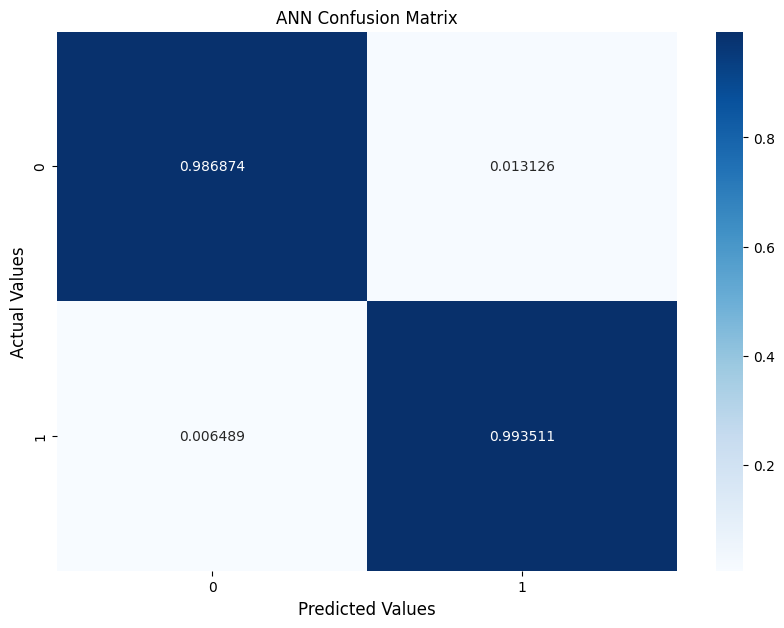

In [55]:
y_test_prepared=sampled_test_prepared['label']
x_test_prepared=sampled_test_prepared.drop('label',axis=1)


y_pred_ann = (best_model_ann.predict(x_test_prepared) >= 0.5).astype(int) # it is returning continous values (probability) so threshold to make them discrete (0,1)

print("ANN Model Evaluation:")

print(classification_report(y_test_prepared, y_pred_ann, digits=4))

plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test_prepared, y_pred_ann, normalize='true')
sns.heatmap(cm, annot=True, fmt='.6f', cmap='Blues')
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()


# **Last Model: Ensemble**

Building the ANN model

In [73]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def create_ann():
    model = Sequential()
    model.add(Dense(96, input_dim=51, activation='relu'))
    model.add(Dense(96, activation='relu'))
    model.add(Dense(96, activation='relu'))
    model.add(Dense(96, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['val_accuracy'])
    return model

# Custom KerasClassifier that implements scikit-learn's classifier interface
class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=20, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

    def fit(self, X, y):
        """Train the model."""
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        print(f"Training model with {X.shape[0]} samples.")
        return self

    def predict(self, X):
        """Make predictions (binary classification)."""
        print(f"Making predictions on {X.shape[0]} samples.")
        return (self.model.predict(X) >= 0.5).astype(int)

    def predict_proba(self, X):
        """Return class probabilities for soft voting."""
        print(f"Predicting probabilities on {X.shape[0]} samples.")
        return self.model.predict(X)

# wrap ANN model with the custom KerasClassifier to make it compatible with other models
ANN_model_wrapped = KerasClassifierCustom(build_fn=create_ann, epochs=20, batch_size=32)

Building the ensembles model

In [105]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Initialize the best models based on best hyperparameters
LR_model = LogisticRegression(solver="lbfgs", random_state=42, max_iter=500, C=200, penalty='l2')
RF_model = RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10,n_estimators=50, random_state=42)
ANN_model = ANN_model_wrapped #run the instant ann model code cell above
ANN_model._estimator_type = "classifier"
NB_model = MultinomialNB(alpha=0.1)

# hard voting
voting_clf_hard = VotingClassifier(estimators=[('LR', LR_model), ('RF', RF_model),('NB', NB_model)],voting='hard', )

# soft voting
voting_clf_soft = VotingClassifier(estimators=[('LR', LR_model), ('RF', RF_model),('NB', NB_model)],voting='soft')

Traing,testing and Evaluation

In [106]:
# Separating the labels from the datasets
X = sampled_train_scaled.drop(columns=['label'])
y = sampled_train_scaled['label']
X_test = sampled_test_prepared.drop(columns=['label'])
y_test = sampled_test_prepared['label']

#Evaluate the results for all algorithms to find best classifier using hard/soft voting

#takes time during ANN so its fine

for clf in (LR_model, RF_model, ANN_model, NB_model, voting_clf_hard, voting_clf_soft):
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9997031319578448
RandomForestClassifier 0.9999363854195381


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with 188636 samples.
Making predictions on 47159 samples.
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
KerasClassifierCustom 0.999618312517229
MultinomialNB 0.8893318348565491
VotingClassifier 0.9997031319578448
VotingClassifier 0.9996819270976908


Hard Voting Model Evaluation:
              precision    recall  f1-score   support

           0     0.9913    0.9869    0.9891     20189
           1     0.9902    0.9935    0.9919     26970

    accuracy                         0.9907     47159
   macro avg     0.9908    0.9902    0.9905     47159
weighted avg     0.9907    0.9907    0.9907     47159



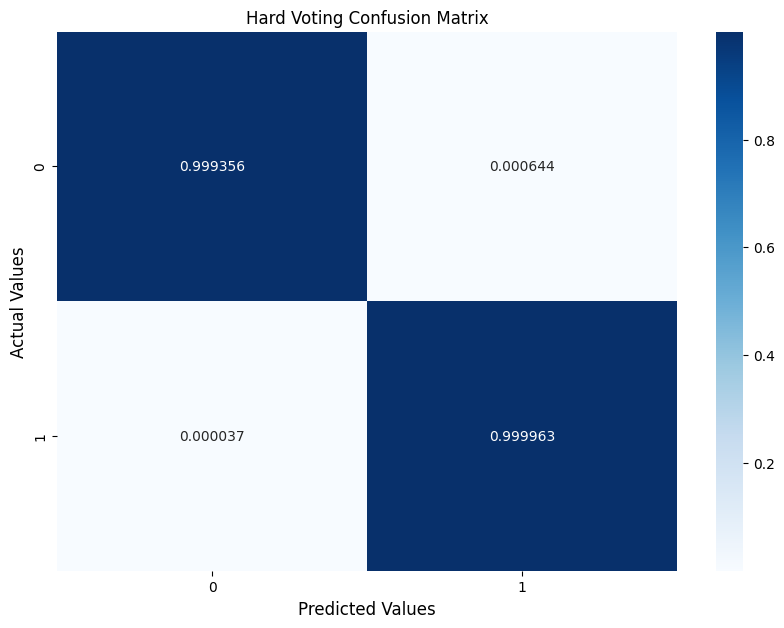

Soft Voting Model Evaluation:
              precision    recall  f1-score   support

           0     0.9999    0.9994    0.9996     20189
           1     0.9995    0.9999    0.9997     26970

    accuracy                         0.9997     47159
   macro avg     0.9997    0.9996    0.9997     47159
weighted avg     0.9997    0.9997    0.9997     47159



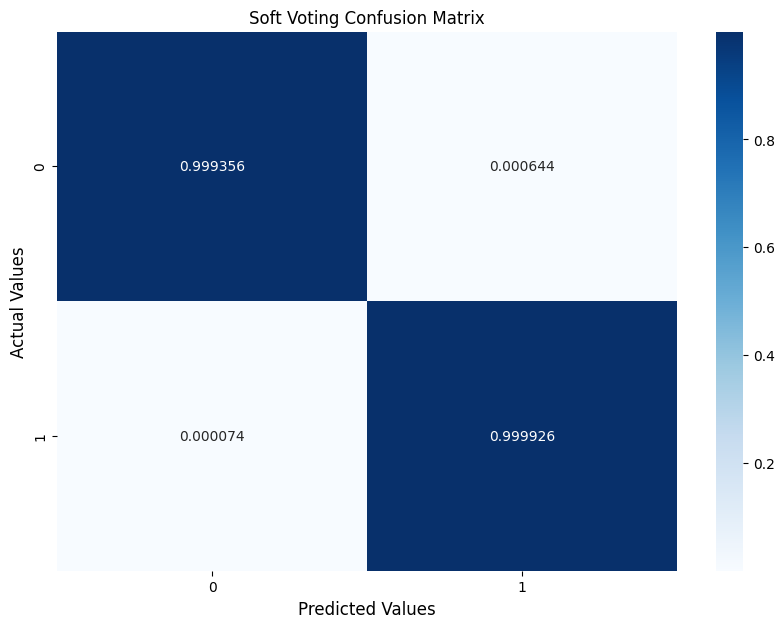

In [108]:
#evaluate model from metrics
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_soft = voting_clf_soft.predict(X_test)


print("Hard Voting Model Evaluation:")

print(classification_report(y_test_prepared, y_pred_ann, digits=4))

plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test_prepared, y_pred_hard, normalize='true')
sns.heatmap(cm, annot=True, fmt='.6f', cmap='Blues')
plt.title('Hard Voting Confusion Matrix')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()


print("Soft Voting Model Evaluation:")
print(classification_report(y_test, y_pred_soft,digits=4))
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test_prepared, y_pred_soft, normalize='true')
sns.heatmap(cm, annot=True, fmt='.6f', cmap='Blues')
plt.title('Soft Voting Confusion Matrix')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()

Finding the AUC-ROC Curve for all used ML algorithims

Predicting probabilities on 47159 samples.
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Model Voting Classifier (Hard) does not support probability or decision scores. Skipping...


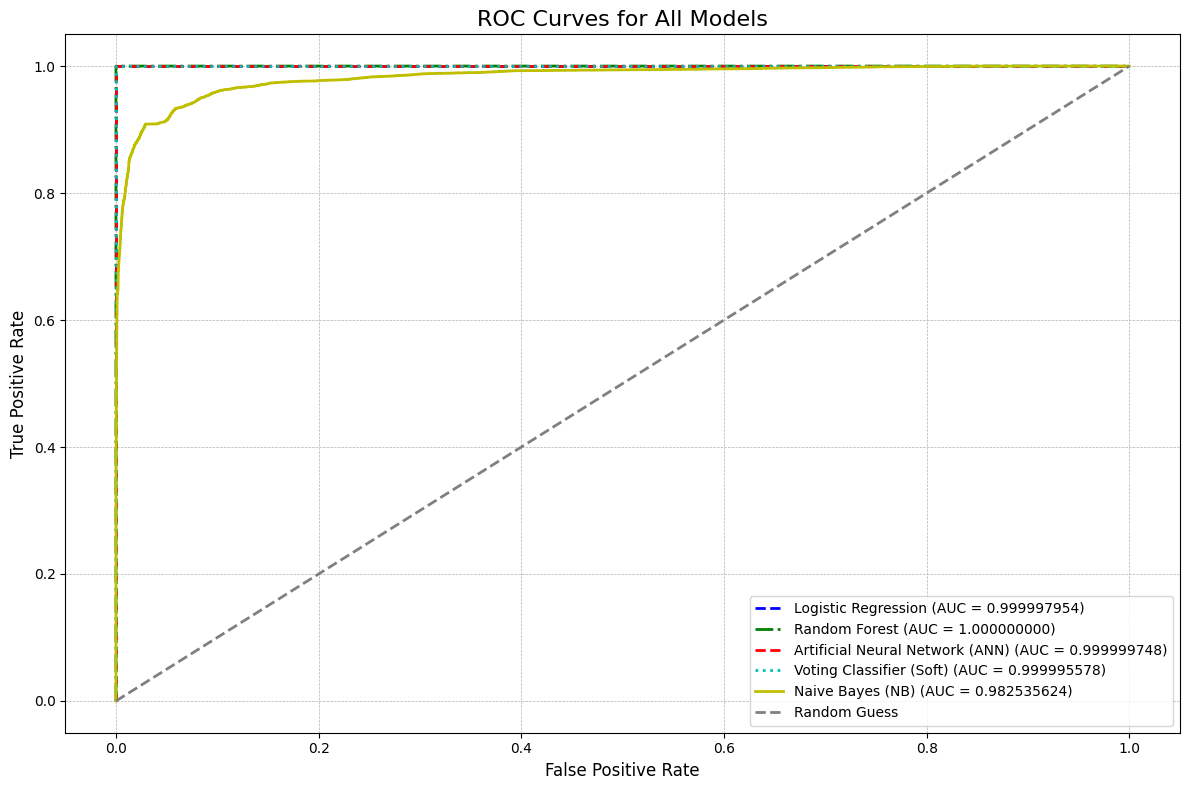

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score


models = [
    ("Logistic Regression", LR_model, 'b', '--'),
    ("Random Forest", RF_model, 'g', '-.'),
    ("Artificial Neural Network (ANN)", ANN_model, 'r', '--'),
    ("Voting Classifier (Soft)", voting_clf_soft, 'c', ':'),
    ("Voting Classifier (Hard)", voting_clf_hard, 'm', ':'),
    ("Naive Bayes (NB)", NB_model, 'y', '-')
]

plt.figure(figsize=(12, 8))

for name, model, color, linestyle in models:
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)
            if y_proba.shape[1] == 1:
                y_proba = y_proba[:, 0]
            else:
                y_proba = y_proba[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(X_test)
        else:
            print(f"Model {name} does not support probability or decision scores. Skipping...")
            continue

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.9f})", color=color, linestyle=linestyle, lw=2)

    except Exception as e:
        print(f"Error processing model {name}: {e}")

# Plot the random guess (diagonal line)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label="Random Guess", lw=2)

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves for All Models", fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


Comparing Gridsearch with Default

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RandomForestClassifier 0.975868869144808


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9967980661167539
MultinomialNB 0.8886956890519307
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.3440
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Sequential 0.9951228821645921
RandomForestClassifier 0.9999363854195381
LogisticRegression 0.9997031319578448
MultinomialNB 0.8893318348565491
Making predictions on 47159 samples.
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
KerasClassifierCustom 0.999618312517229


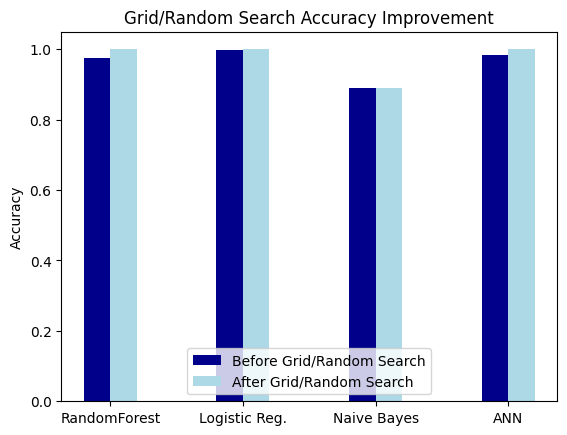

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
model_names = ['RandomForest', 'Logistic Reg.', 'Naive Bayes', 'ANN']
LR_model_basic = LogisticRegression()
RF_model_basic = RandomForestClassifier(max_depth=1,n_estimators=10)
NB_model_basic = MultinomialNB()

ANN_model_basic = Sequential()
ANN_model_basic.add(Dense(4, activation='relu', input_shape=(51,)))
ANN_model_basic.add(Dense(1, activation='sigmoid'))
ANN_model_basic.compile(loss='binary_crossentropy')



accuracy_before = []

basic_models=[RF_model_basic,LR_model_basic,NB_model_basic,ANN_model_basic]
for i,model in enumerate(basic_models):
    model.fit(X, y)
    if model.__class__.__name__ == 'Sequential':
        y_pred = (model.predict(X_test) >= 0.51).astype(int)
    else:
      y_pred = model.predict(X_test)
    print(model.__class__.__name__, accuracy_score(y_test, y_pred))
    accuracy_before.append(round(accuracy_score(y_test, y_pred),3))



models=[RF_model,LR_model,NB_model,ANN_model]
accuracy_after = []
for i,model in enumerate(models):
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, accuracy_score(y_test, y_pred))
    accuracy_after.append(accuracy_score(y_test, y_pred))

# Set up the plot
fig, ax = plt.subplots()

# Define the width of the bars
bar_width = 0.2

# Calculate the x-positions for the bars
x_positions = np.arange(len(model_names))

# Create the bars
ax.bar(x_positions - bar_width/2, accuracy_before, bar_width, label='Before Grid/Random Search',color='darkblue')
ax.bar(x_positions + bar_width/2, accuracy_after, bar_width, label='After Grid/Random Search',color='lightblue')

# Set the x-axis labels
ax.set_xticks(x_positions)
ax.set_xticklabels(model_names, ha='center')

# Set the y-axis label
ax.set_ylabel('Accuracy')

# Set the title
ax.set_title('Grid/Random Search Accuracy Improvement')

# Add a legend
ax.legend(loc='lower center')

# Show the plot
plt.show()